In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
import statsmodels.api as sm
from sklearn.metrics import r2_score
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.duplicated().sum()

24

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96429 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96429 non-null  object 
 1   Summary                   96429 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           96429 non-null  float64
 4   Apparent Temperature (C)  96429 non-null  float64
 5   Humidity                  96429 non-null  float64
 6   Wind Speed (km/h)         96429 non-null  float64
 7   Wind Bearing (degrees)    96429 non-null  float64
 8   Visibility (km)           96429 non-null  float64
 9   Loud Cover                96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
 11  Daily Summary             96429 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.6+ MB


In [7]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
df.groupby("Precip Type").size()

Precip Type
rain    85200
snow    10712
dtype: int64

In [9]:
df.groupby("Summary").size()

Summary
Breezy                                    54
Breezy and Dry                             1
Breezy and Foggy                          35
Breezy and Mostly Cloudy                 516
Breezy and Overcast                      528
Breezy and Partly Cloudy                 386
Clear                                  10873
Dangerously Windy and Partly Cloudy        1
Drizzle                                   39
Dry                                       34
Dry and Mostly Cloudy                     14
Dry and Partly Cloudy                     86
Foggy                                   7148
Humid and Mostly Cloudy                   40
Humid and Overcast                         7
Humid and Partly Cloudy                   17
Light Rain                                63
Mostly Cloudy                          28094
Overcast                               16597
Partly Cloudy                          31726
Rain                                      10
Windy                                      8
Wi

In [10]:
df.groupby("Daily Summary").size()

Daily Summary
Breezy and foggy starting in the evening.            24
Breezy and foggy until morning.                      24
Breezy and mostly cloudy overnight.                  24
Breezy and partly cloudy in the afternoon.           24
Breezy in the morning and foggy in the evening.      24
                                                   ... 
Partly cloudy until night.                         6169
Rain throughout the day.                             24
Rain until afternoon.                                24
Rain until morning.                                  24
Windy in the afternoon.                              24
Length: 214, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96429 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96429 non-null  object 
 1   Summary                   96429 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           96429 non-null  float64
 4   Apparent Temperature (C)  96429 non-null  float64
 5   Humidity                  96429 non-null  float64
 6   Wind Speed (km/h)         96429 non-null  float64
 7   Wind Bearing (degrees)    96429 non-null  float64
 8   Visibility (km)           96429 non-null  float64
 9   Loud Cover                96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
 11  Daily Summary             96429 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.6+ MB


In [12]:
X = df[["Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)"]]
Y = df["Apparent Temperature (C)"]
X_2 = df[["Temperature (C)"]]

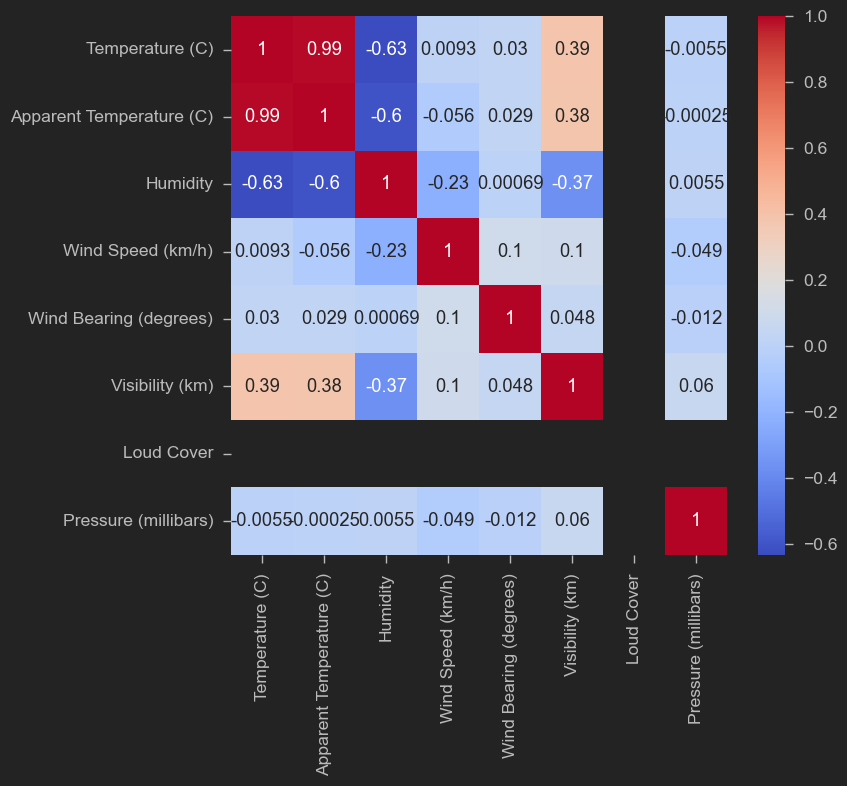

In [13]:
sns.heatmap(df.corr(),annot = True , cmap="coolwarm")
plt.show()

In [14]:
# I choose the related columns as they are correlated to the Apparent temperature 

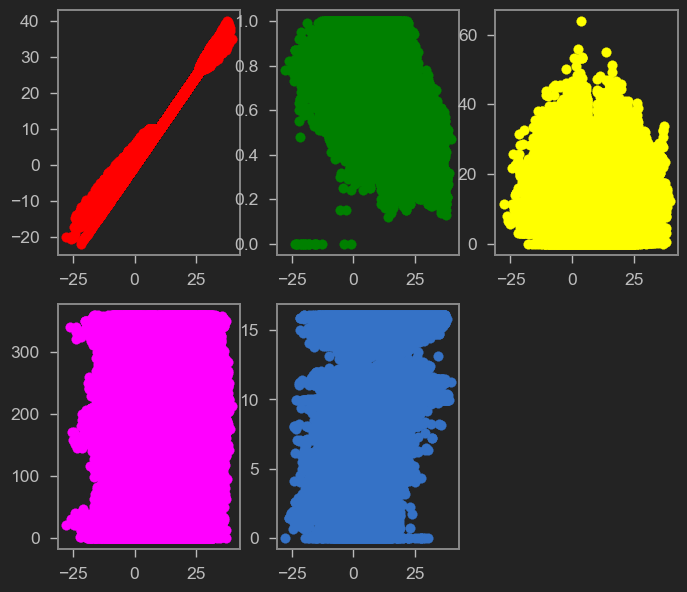

In [15]:
figure = plt.figure("Correlation Plot")
temperature = figure.add_subplot(2,3,1)
humidity = figure.add_subplot(2,3,2)
wind_speed = figure.add_subplot(2,3,3)
wind_bearing = figure.add_subplot(2,3,4)
visibility = figure.add_subplot(2,3,5)
temperature.scatter(df["Apparent Temperature (C)"],df["Temperature (C)"],color="red")
humidity.scatter(df["Apparent Temperature (C)"],df["Humidity"],color="green")
wind_speed.scatter(df["Apparent Temperature (C)"],df["Wind Speed (km/h)"],color="yellow")
wind_bearing.scatter(df["Apparent Temperature (C)"],df["Wind Bearing (degrees)"],color="magenta")
visibility.scatter(df["Apparent Temperature (C)"],df["Visibility (km)"])

### Linear Resgression

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_2,Y,test_size = 0.2 ,random_state=0)
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)
regressor1 = LinearRegression()
r1 = regressor1.fit(X_train1,y_train1)
y_pred1 = regressor1.predict(X_test1)
print(r2_score(y_test1,y_pred1))

0.9854035953993515


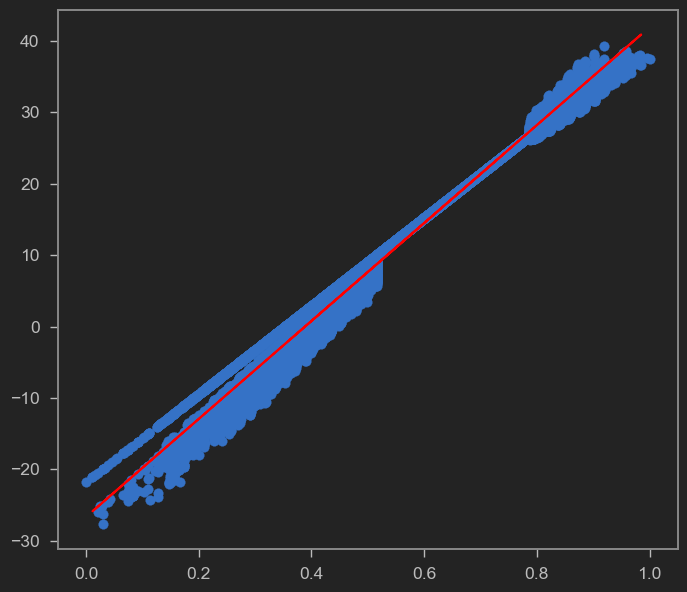

In [17]:
plt.scatter(X_train1,y_train1)
plt.plot(X_test1,y_pred1,color="red")
plt.show()

In [18]:
X1 = sm.add_constant(X_2)
est = sm.OLS(Y, X_2)
est1 = est.fit()
print(est1.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Apparent Temperature (C)   R-squared (uncentered):                   0.983
Model:                                  OLS   Adj. R-squared (uncentered):              0.983
Method:                       Least Squares   F-statistic:                          5.572e+06
Date:                      Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                              16:49:46   Log-Likelihood:                     -2.0305e+05
No. Observations:                     96429   AIC:                                  4.061e+05
Df Residuals:                         96428   BIC:                                  4.061e+05
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                      coef    std err          t      P>|t| 

### Multi Regression

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size = 0.2 ,random_state=0)
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)
regressor2 = LinearRegression()
r2 = regressor2.fit(X_train2,y_train2)
y_pred2 = regressor2.predict(X_test2)
print(r2_score(y_test2,y_pred2))

0.9900361253496807


In [20]:
X2 = sm.add_constant(X)
est_ = sm.OLS(Y, X2)
est2 = est_.fit()
print(est2.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.878e+06
Date:                      Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                              16:49:47   Log-Likelihood:            -1.4409e+05
No. Observations:                     96429   AIC:                         2.882e+05
Df Residuals:                         96423   BIC:                         2.882e+05
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### Polynomial

In [21]:
poly_regs3 = PolynomialFeatures(degree= 4)  
x_poly3 = poly_regs3.fit_transform(X_2)  
lin_reg3 =LinearRegression()  
lin_reg3.fit(x_poly3, Y)  
y_pred3 = lin_reg3.predict(x_poly3)
print(r2_score(Y,y_pred3))

0.9875920892195539


In [22]:
X3 = sm.add_constant(x_poly3)
est__ = sm.OLS(Y, X3)
est3 = est__.fit()
print(est3.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.988
Model:                                  OLS   Adj. R-squared:                  0.988
Method:                       Least Squares   F-statistic:                 1.919e+06
Date:                      Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                              16:49:47   Log-Likelihood:            -1.5371e+05
No. Observations:                     96429   AIC:                         3.074e+05
Df Residuals:                         96424   BIC:                         3.075e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------